In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [3]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
vec_king = wv['king']


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [5]:
wv['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [6]:
# cosine _ similarity
wv.most_similar('man')


[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [7]:
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [8]:
print(wv.similarity('man', 'king'))
wv.similarity('man', 'queen')

0.22942673


0.16658202

In [9]:
vec = wv['king'] - wv['man'] + wv['woman']
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [10]:
# Word Cloud

import os

from os import path
from wordcloud import WordCloud

In [11]:
text = """
The morning sun cast a golden hue over the tranquil lake, its rays dancing on the surface of the water 
like a thousand shimmering diamonds. Birds chirped merrily in the nearby trees, their cheerful songs 
echoing through the stillness of the dawn. A gentle breeze rustled the leaves, carrying with it the 
sweet scent of wildflowers blooming along the shore. It was a serene scene, a moment of pure tranquility
amidst the hustle and bustle of everyday life."""

In [12]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

In [13]:
wordcloud

(-0.5, 399.5, 199.5, -0.5)

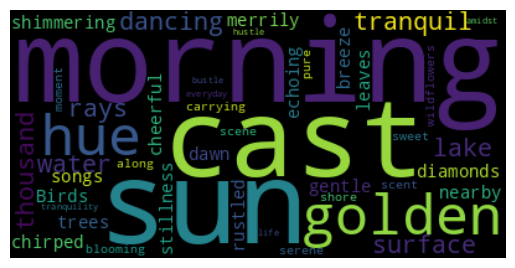

In [14]:
# Display the generated image

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

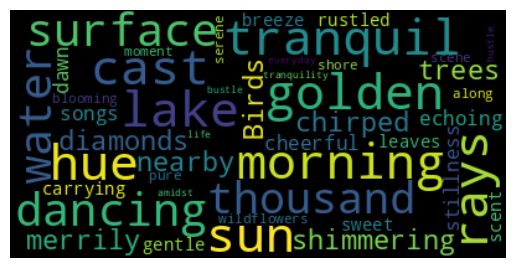

In [15]:
# lower max_font_size

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [16]:
wv.most_similar('programmer')

[('programmers', 0.6646653413772583),
 ('Programmer', 0.6181110739707947),
 ('coder', 0.6113353967666626),
 ('programer', 0.6070293188095093),
 ('computer_programmer', 0.5910932421684265),
 ('Jon_Shiring', 0.5551139116287231),
 ('sysadmin', 0.5432621836662292),
 ('animator', 0.5348355770111084),
 ('coders', 0.5315176248550415),
 ('engineer', 0.5284372568130493)]